In [1]:
usePackage <- function(p) {
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, dep = TRUE)
  require(p, character.only = TRUE, quietly = TRUE)
}

usePackage("data.table") 
usePackage("ggplot2")

Sys.setlocale("LC_TIME", "us")

options(stringsAsFactors = FALSE)

[1] "English_United States.1252"

In [19]:
raw <- fread('grep Thread ..\\logs\\win_local_bench*', 
             sep=",", 
             col.names=c("time", "response_time", "case", "thread", "label"))


tidy <- data.table(raw, do.call(rbind, strsplit(raw$label,"-")))

setnames(tidy, "V2", "posts_num")
setnames(tidy, "V3", "thread_num")


tidy$thread_num <- as.numeric(tidy$thread_num)
tidy$posts_num <- as.numeric(tidy$posts_num)

tidy$time <- as.POSIXct(sapply(strsplit(tidy$time, ":"), function(x){ paste(x[2:4], collapse=":")}), tz="", format="%Y-%m-%d %H:%M:%OS")

head(tidy)
tail(tidy)

time,response_time,case,thread,label,V1,posts_num,thread_num
2018-05-16 11:50:10,0.00000000,started,Thread-0,windows-1000000-5,windows,1e+06,5
2018-05-16 11:50:10,0.00000000,started,Thread-1,windows-1000000-5,windows,1e+06,5
2018-05-16 11:50:10,0.00000000,started,Thread-2,windows-1000000-5,windows,1e+06,5
2018-05-16 11:50:10,0.00000000,started,Thread-3,windows-1000000-5,windows,1e+06,5
2018-05-16 11:50:10,0.00000000,started,Thread-4,windows-1000000-5,windows,1e+06,5
2018-05-16 11:50:10,0.07699275,read,Thread-0,windows-1000000-5,windows,1e+06,5


time,response_time,case,thread,label,V1,posts_num,thread_num
2018-05-24 17:59:40,0.0010013580,read,Thread-29,windows-400000-40,windows,4e+05,40
2018-05-24 17:59:40,5.1375927925,finished,Thread-38,windows-400000-40,windows,4e+05,40
2018-05-24 17:59:40,5.1714034081,finished,Thread-29,windows-400000-40,windows,4e+05,40
2018-05-24 17:59:40,0.0010046959,upvote,Thread-33,windows-400000-40,windows,4e+05,40
2018-05-24 17:59:40,0.0009763241,upvote,Thread-33,windows-400000-40,windows,4e+05,40
2018-05-24 17:59:40,5.1833171844,finished,Thread-33,windows-400000-40,windows,4e+05,40


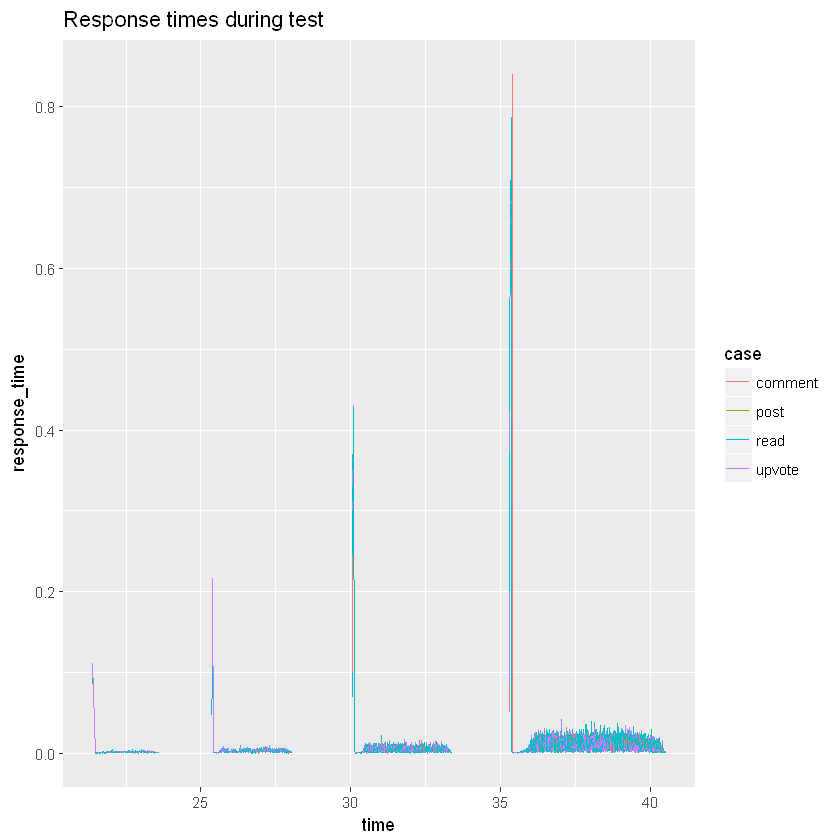

In [20]:
  ggplot(data = tidy[case != "finished"][case != "started"][posts_num==400000], 
         aes(x=time, 
             y=response_time, 
             group=thread_num, 
             colour=case)) + 
    geom_line() + ggtitle(paste0("Response times during test")) 

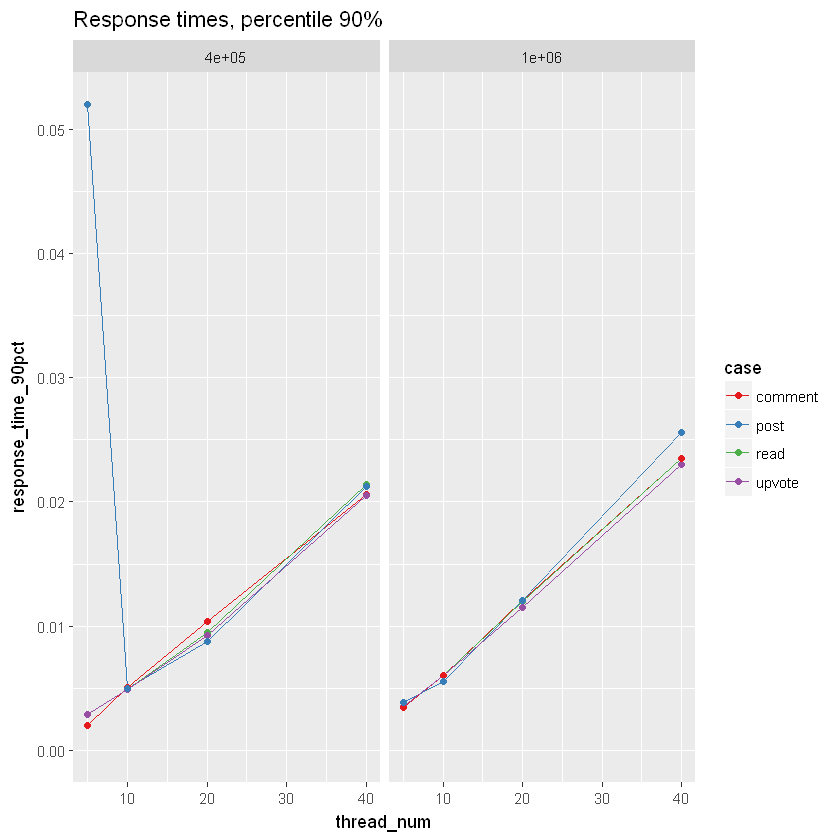

In [21]:
  ggplot(data = tidy[case != "finished"][case != "started"][,list(response_time_90pct = quantile(response_time, 0.9)), 
                                                            by="case,thread_num,posts_num"], 
         aes(x=thread_num, 
             y=response_time_90pct, 
             group=case, 
             colour=case)) + ylim(0,NA)+ scale_color_brewer(palette="Set1") + facet_grid( . ~ posts_num ) +
    geom_line() + geom_point() + ggtitle(paste0("Response times, percentile 90%")) 

Saving 6.67 x 6.67 in image


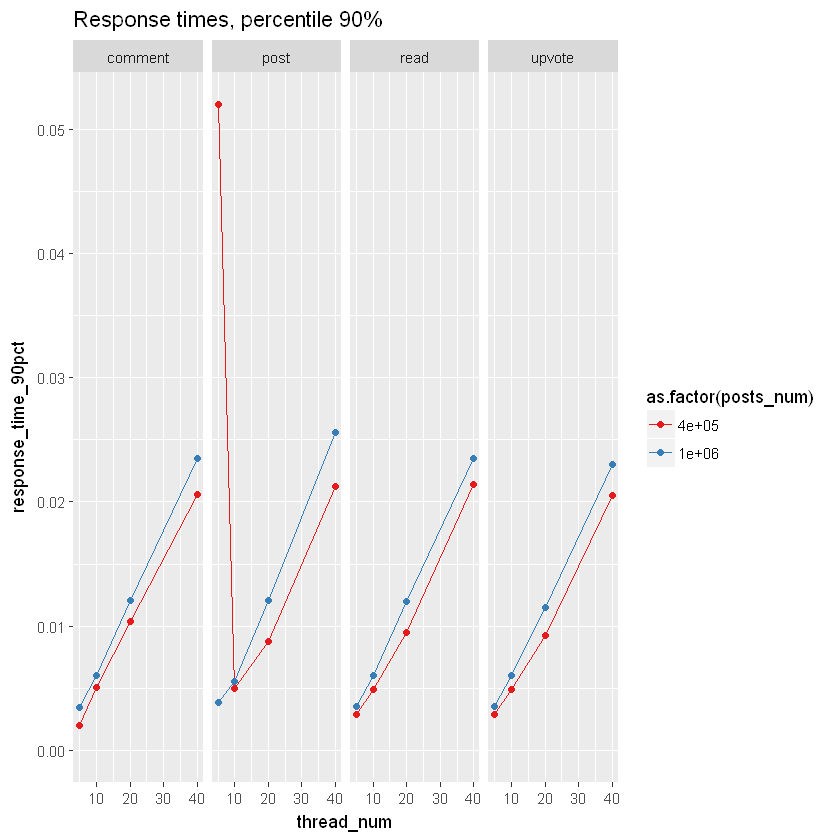

In [24]:
 ggplot(data = tidy[case != "finished"][case != "started"][,list(response_time_90pct = quantile(response_time, 0.9)), 
                                                           by="case,thread_num,posts_num"], 
         aes(x=thread_num, 
             y=response_time_90pct, 
             group=as.factor(posts_num), 
             colour=as.factor(posts_num))) + ylim(0,NA)+ scale_color_brewer(palette="Set1") + facet_grid( . ~ case ) + 
    geom_line() + geom_point()+ ggtitle(paste0("Response times, percentile 90%")) 

ggsave("resp_time.png")